# Daria Bromot (FS500047)

## K Nearest Neighbors Project 

## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Get the Data
**Read the 'KNN_Project_Data csv file into a dataframe**

In [44]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [45]:
df.head(10)

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   
5  1587.993461   667.420121  2072.048544  364.624958   905.011385   
6  1497.293624   822.435853   908.059366  671.797517  1280.270442   
7  1172.820769  1166.958461   455.656588  445.572745  1109.894585   
8   839.494647  1089.747059   653.699894  659.334590  1529.725972   
9  1028.689140   202.089774  1030.841860  429.109102   943.104815   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   
5  2229.178514   880.442566  568.698408   645.719217  2156.949990   
6  1910.066313  1052.812386  713.757499   703.951632  1088.493788   
7  1045.551452  1301.821786  264.940137   945.023932  2307.922229   
8  1521.320489  1401.676227  433.025043  1289.063583  1690.149835   
9  1978.506855   653.178512  753.655291  1336.375960  1057.864848   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0  
5             1  
6             0  
7             0  
8             0  
9             1

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

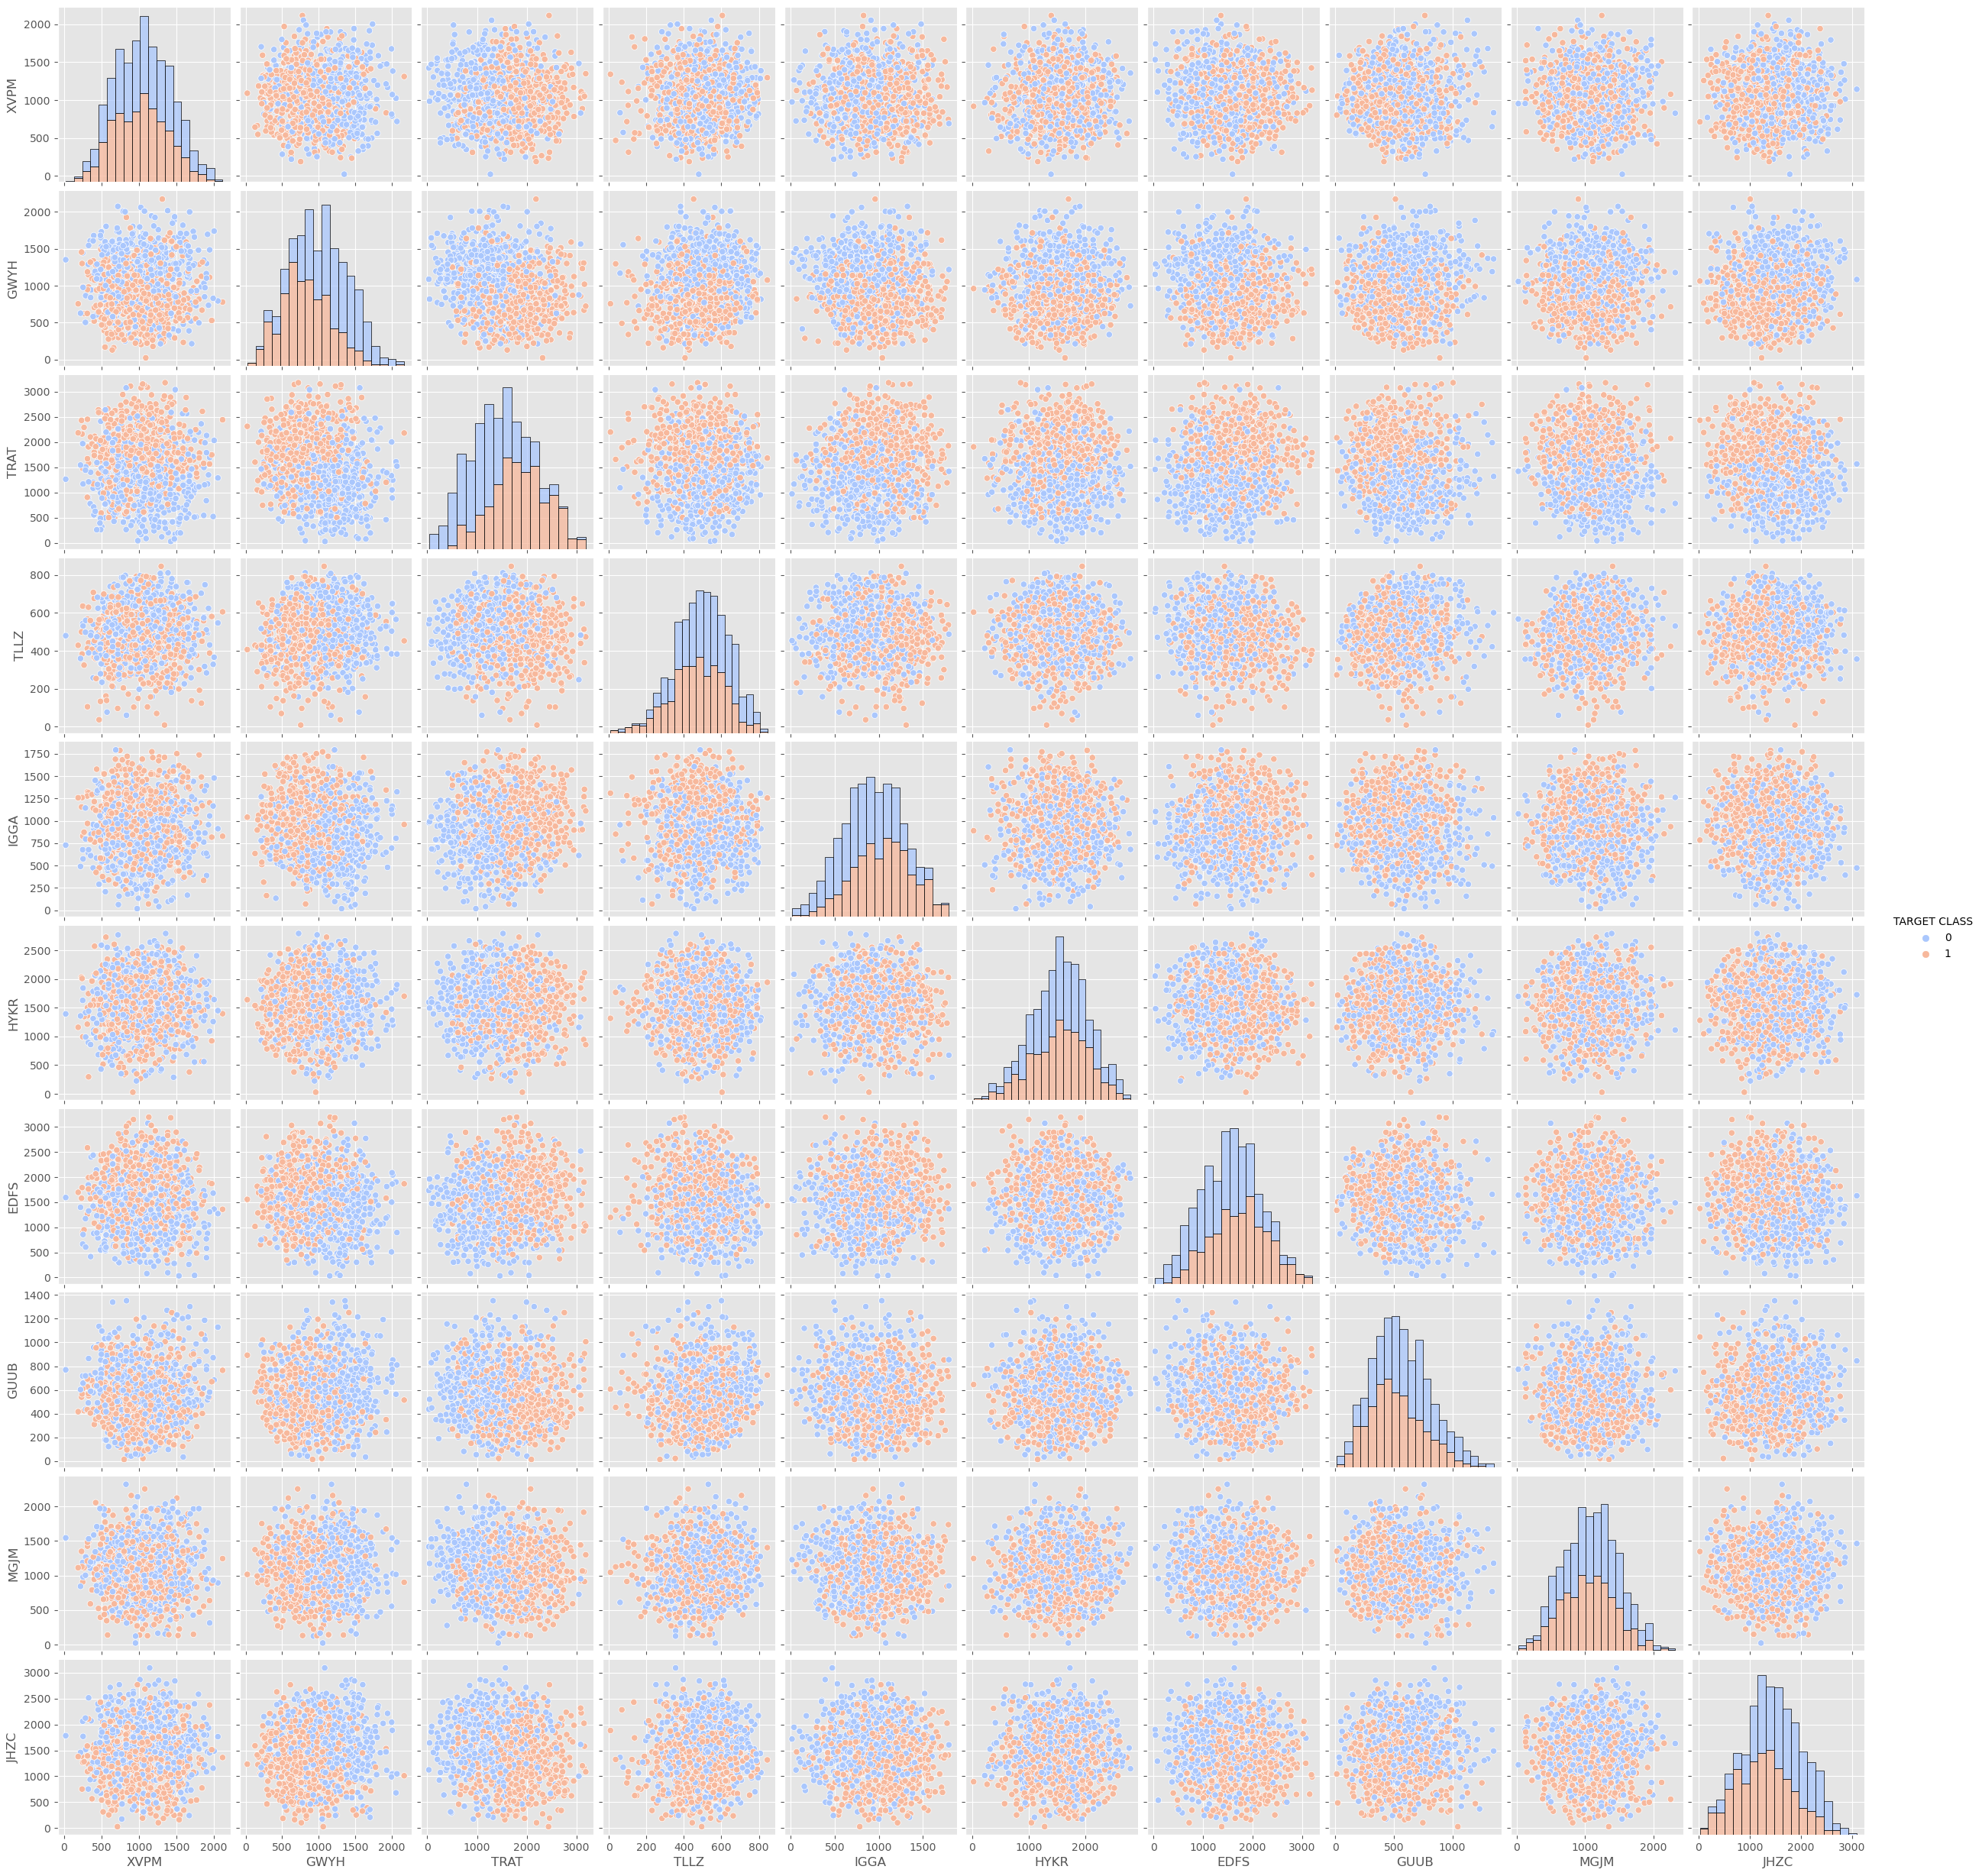

In [46]:
sns.pairplot(df, hue='TARGET CLASS', diag_kind='hist', diag_kws=dict(multiple="stack", edgecolor='black'), palette="coolwarm")

# Standardize the Variables

Time to standardize the variables.

**Import StandardScaler from Scikit learn.**

In [47]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [48]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [49]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [50]:
X = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [51]:
df_feat = pd.DataFrame(X,columns=df.columns[:-1])
df_feat.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [54]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [55]:
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
                           weights='uniform')

**Fit this KNN model to the training data.**

In [56]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=1, n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [57]:
prediction = KNN.predict(X_test)

**Create a confusion matrix and classification report.**

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
print(confusion_matrix(y_test,prediction))

[[109  43]
 [ 41 107]]


In [60]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [61]:
error_rate = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))
print(error_rate)

[0.28, 0.29, 0.21666666666666667, 0.22, 0.20666666666666667, 0.21, 0.18333333333333332, 0.19, 0.19, 0.17666666666666667, 0.18333333333333332, 0.18333333333333332, 0.18333333333333332, 0.18, 0.18, 0.18, 0.17, 0.17333333333333334, 0.17666666666666667, 0.18333333333333332]


**Now create the following plot using the information from your for loop.**

Text(0.5, 1.0, 'Error Rate vs K-value')

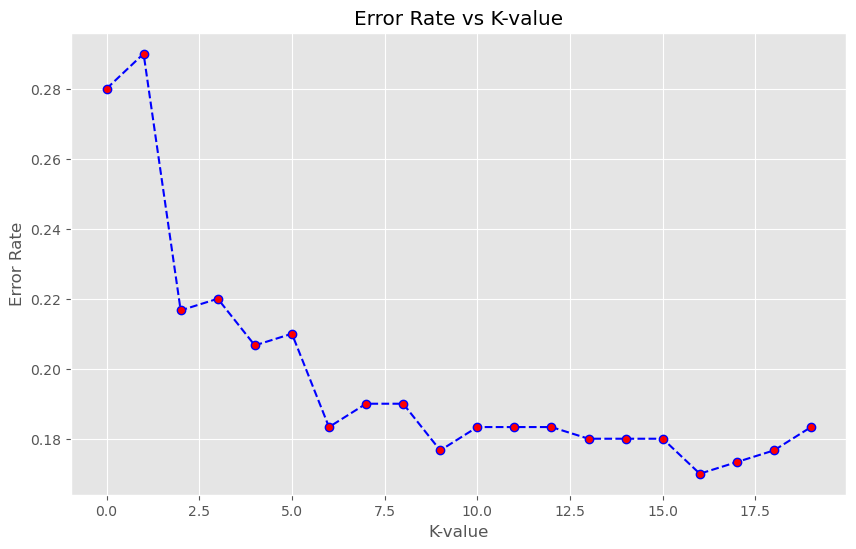

In [62]:
plt.style.use('ggplot')
plt.subplots(figsize = (10,6))
plt.plot(error_rate, linestyle = 'dashed', color = 'blue', marker = 'o', markerfacecolor = 'red')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [63]:
myKNN = KNeighborsClassifier(n_neighbors = 31)
myKNN.fit(X_train,y_train)
y_predict = myKNN.predict(X_test)

print('WITH K=31')
print('')
print(confusion_matrix(y_test,y_predict))
print('')
print(classification_report(y_test,y_predict))

WITH K=31

[[123  29]
 [ 19 129]]

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

